<h1>Project 7</h1>

<h2>Fraud Loan Prediction</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('Fraud_Loan_Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [3]:
df.shape

(614, 13)

***Checking data types and null count of the columns***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can observe that there are multiple null values present in the dataset

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

***Treating null values***

In [6]:
df.dropna(subset=["Credit_History"], axis=0, inplace=True)
df.dropna(subset=["Self_Employed"], axis=0, inplace=True)
df.dropna(subset=["LoanAmount"], axis=0, inplace=True)
df.dropna(subset=["Loan_Amount_Term"], axis=0, inplace=True)
df.dropna(subset=["Dependents"], axis=0, inplace=True)
df.dropna(subset=["Gender"], axis=0, inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Checking data types***

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

***Visualizing the dataset***

AxesSubplot(0.125,0.125;0.775x0.755)


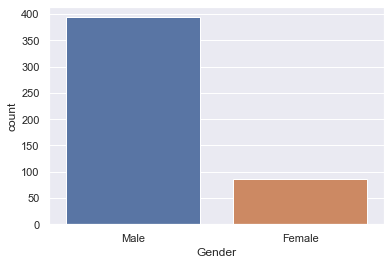

AxesSubplot(0.125,0.125;0.775x0.755)


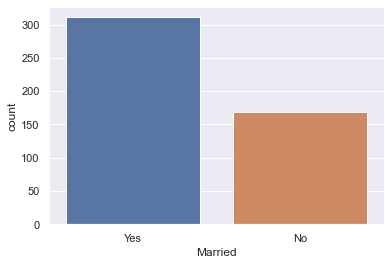

AxesSubplot(0.125,0.125;0.775x0.755)


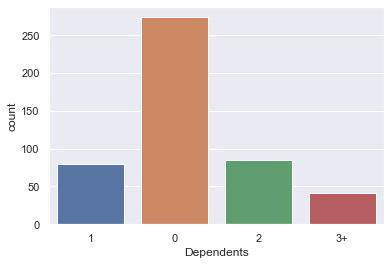

AxesSubplot(0.125,0.125;0.775x0.755)


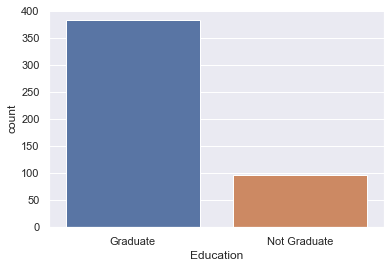

AxesSubplot(0.125,0.125;0.775x0.755)


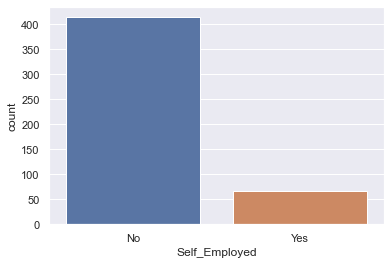

AxesSubplot(0.125,0.125;0.775x0.755)


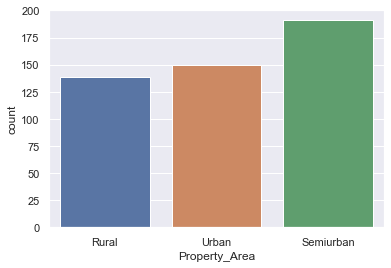

AxesSubplot(0.125,0.125;0.775x0.755)


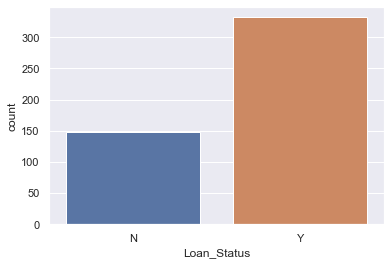

In [8]:
cold=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
    
for i in range(0,7):
    print(sns.countplot(df[cold[i]]))
    plt.show()

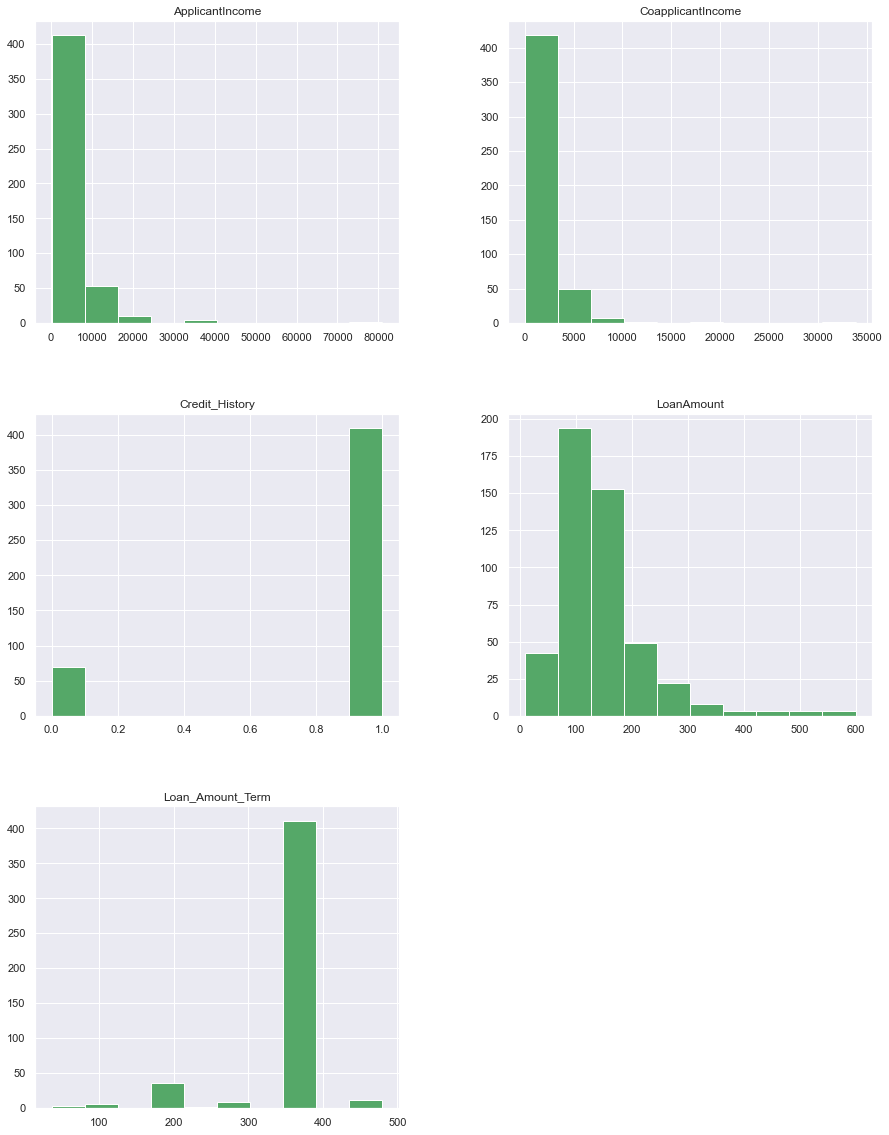

In [9]:
df.hist(figsize=(15,20),color='g')
plt.show()

***Lets convert all our categorical data to numerical***


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Loan_Status'])
y1=le.transform(df['Loan_Status'])

In [11]:
y=pd.DataFrame(y1,columns =["Loan_Status"])
y.head()

,Loan_Status
0,0
1,1
2,1
3,1
4,1


As our other columns has more than 2 types, lets use get dummies function

In [12]:
dfd=df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
x1=pd.get_dummies(dfd)
x1.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [13]:
df1=df.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [14]:
x=pd.concat([df1,x1],axis=1)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [27]:
df_f=pd.concat([x,y],axis=1)

***Lets calculate correlation***

In [28]:
df_f.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.032644,0.032644,-0.036717,0.036717,-0.121405,...,-0.017426,0.143633,0.131172,-0.131172,-0.170785,0.170785,0.045154,0.000551,-0.044767,0.028841
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.156171,0.156171,-0.102950,0.102950,0.000991,...,0.028266,-0.019006,0.074499,-0.074499,0.001509,-0.001509,-0.001101,-0.008322,0.009866,0.079526
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.098975,0.098975,-0.183442,0.183442,-0.178494,...,0.061174,0.115373,0.172780,-0.172780,-0.120389,0.120389,0.086569,0.013365,-0.098826,0.085849
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,0.088704,-0.088704,0.107504,-0.107504,0.118518,...,-0.005885,-0.066826,0.102168,-0.102168,0.034852,-0.034852,0.033777,0.030346,-0.065097,0.019763
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.022447,0.022447,-0.029095,0.029095,0.011429,...,0.037047,-0.063797,0.056656,-0.056656,0.023568,-0.023568,-0.022504,0.046480,-0.027062,-0.046434
Gender_Female,-0.032644,-0.156171,-0.098975,0.088704,-0.022447,1.000000,-1.000000,0.349424,-0.349424,0.185582,...,-0.159802,-0.123341,0.059245,-0.059245,-0.002761,0.002761,-0.058739,0.108538,-0.057137,-0.001041
Gender_Male,0.032644,0.156171,0.098975,-0.088704,0.022447,-1.000000,1.000000,-0.349424,0.349424,-0.185582,...,0.159802,0.123341,-0.059245,0.059245,0.002761,-0.002761,0.058739,-0.108538,0.057137,0.001041
Married_No,-0.036717,-0.102950,-0.183442,0.107504,-0.029095,0.349424,-0.349424,1.000000,-1.000000,0.410047,...,-0.261974,-0.162856,0.001652,-0.001652,0.015674,-0.015674,0.039048,-0.011121,-0.026467,-0.036780
Married_Yes,0.036717,0.102950,0.183442,-0.107504,0.029095,-0.349424,0.349424,-1.000000,1.000000,-0.410047,...,0.261974,0.162856,-0.001652,0.001652,-0.015674,0.015674,-0.039048,0.011121,0.026467,0.036780
Dependents_0,-0.121405,0.000991,-0.178494,0.118518,0.011429,0.185582,-0.185582,0.410047,-0.410047,1.000000,...,-0.534999,-0.352453,0.014369,-0.014369,0.081585,-0.081585,0.043191,0.034147,-0.078323,-0.067592


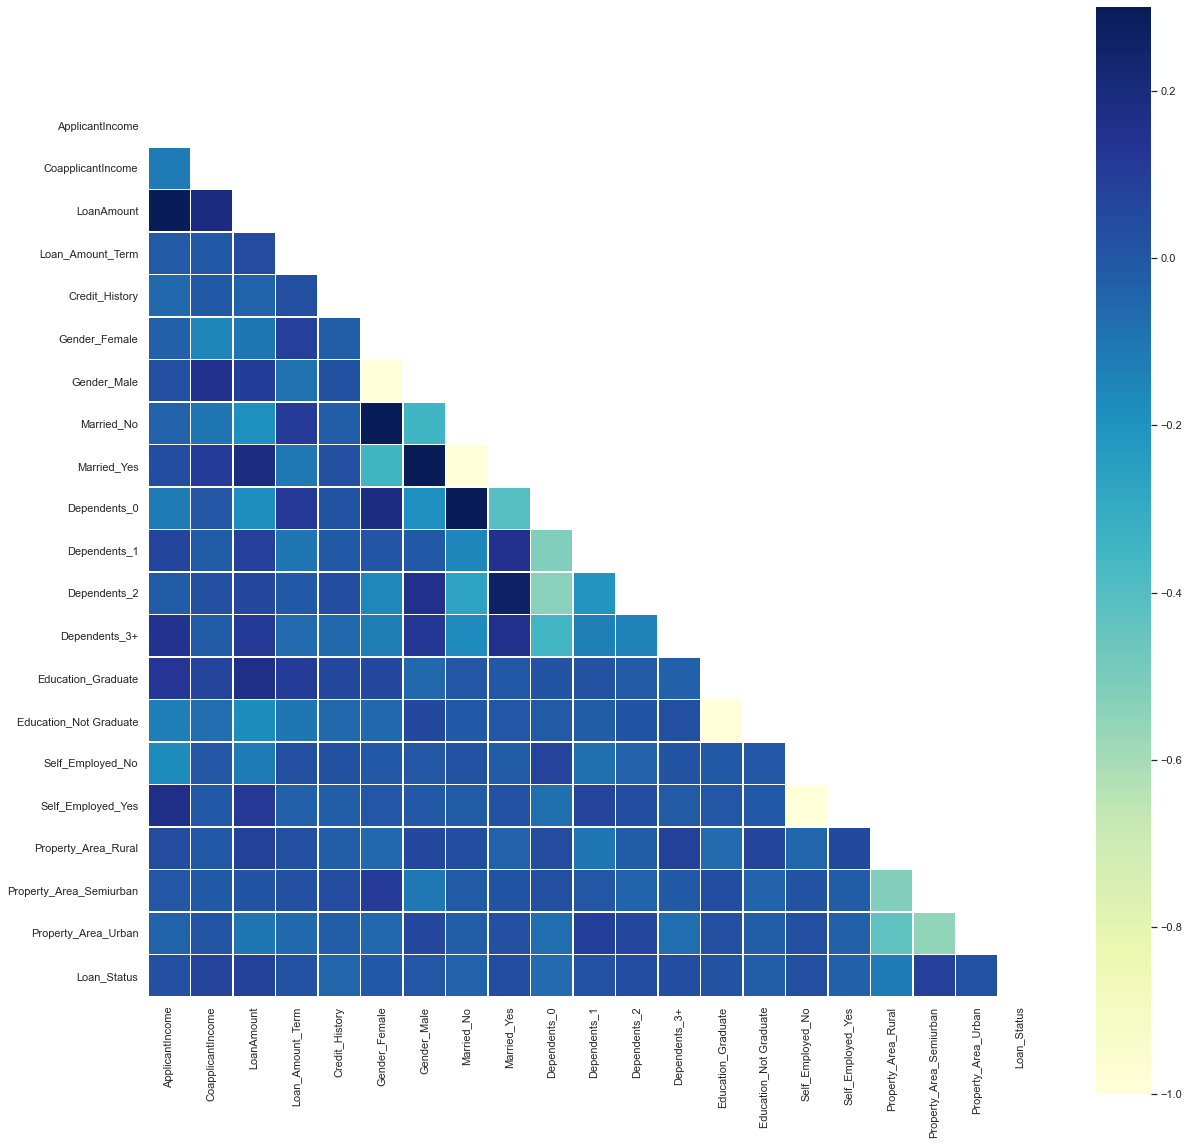

In [29]:
import numpy as np
corr = df_f.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

In [30]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [31]:
y.head()

,Loan_Status
0,0
1,1
2,1
3,1
4,1


We have dropped column Loan_ID because it was just a ID number and didn't have any relation with out target variable

<h2>End of EDA Process</h2>


Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is Bivariant, we are going to do classification analysis

***Lets import required packages***

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***Lets split our data randomly and see which model works better***

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets import all the classification models***

In [34]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [35]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

***Lets create a loop that will execute all our models***

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.59375


Cross_Val_Score =  0.6208333333333333


roc_auc_score =  0.5031512605042017


classification_report
               precision    recall  f1-score   support

           0       0.30      0.29      0.29        28
           1       0.71      0.72      0.72        68

    accuracy                           0.59        96
   macro avg       0.50      0.50      0.50        96
weighted avg       0.59      0.59      0.59        96



[[ 8 20]
 [19 49]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


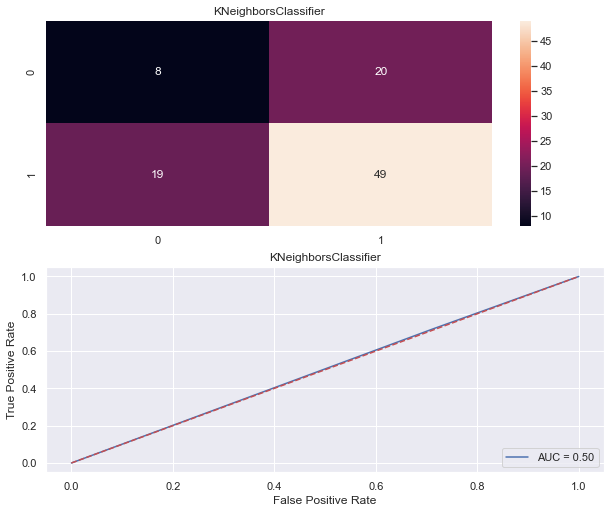




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  0.7083333333333334


Cross_Val_Score =  0.6895833333333332


roc_auc_score =  0.5


classification_report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



[[ 0 28]
 [ 0 68]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


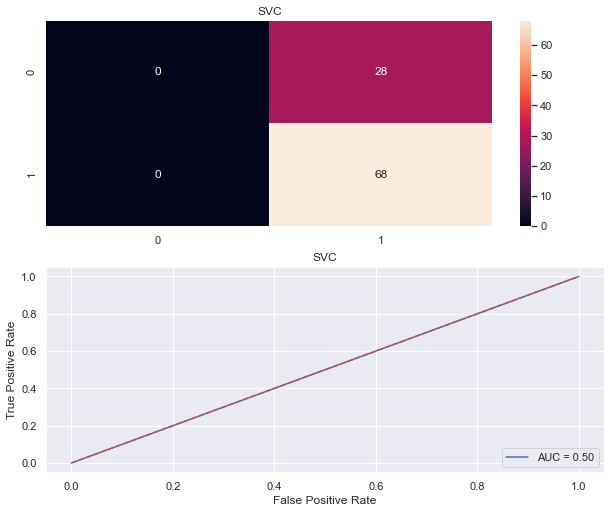




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.8125


Cross_Val_Score =  0.8


roc_auc_score =  0.6890756302521008


classification_report
               precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96



[[11 17]
 [ 1 67]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


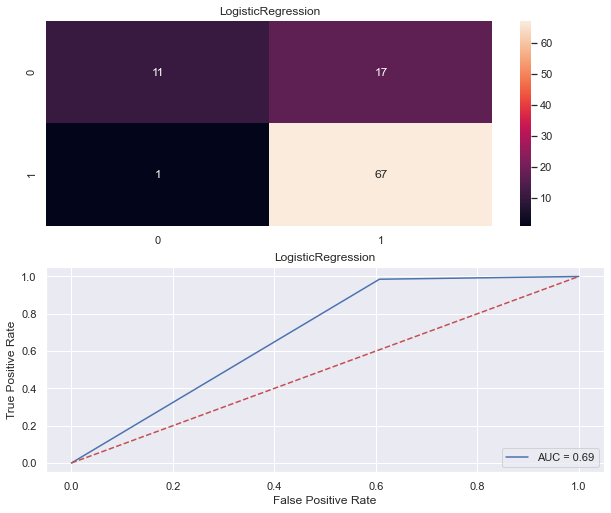




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.7083333333333334


Cross_Val_Score =  0.73125


roc_auc_score =  0.6680672268907563


classification_report
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        28
           1       0.81      0.76      0.79        68

    accuracy                           0.71        96
   macro avg       0.66      0.67      0.66        96
weighted avg       0.72      0.71      0.71        96



[[16 12]
 [16 52]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


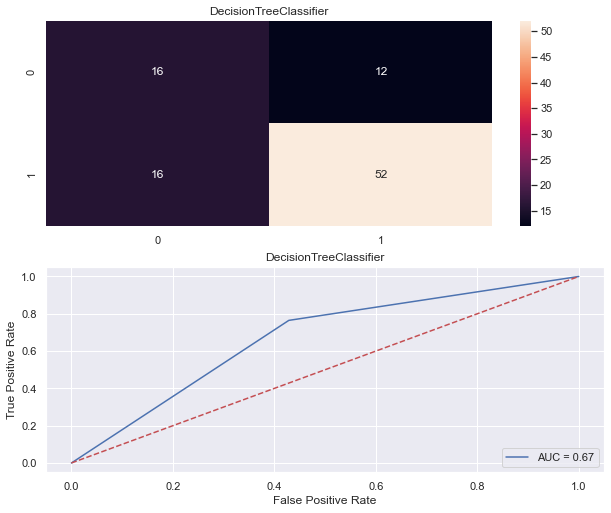




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  0.8229166666666666


Cross_Val_Score =  0.7895833333333333


roc_auc_score =  0.7069327731092437


classification_report
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        28
           1       0.81      0.99      0.89        68

    accuracy                           0.82        96
   macro avg       0.87      0.71      0.74        96
weighted avg       0.84      0.82      0.80        96



[[12 16]
 [ 1 67]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


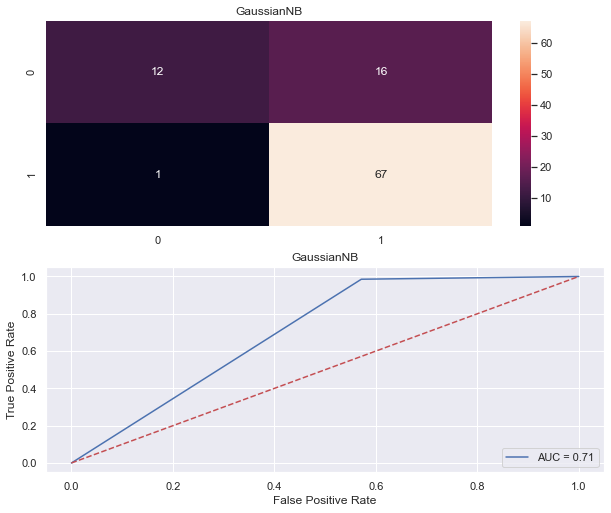

In [36]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [37]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,59.375000,62.083333,50.315126
1,SVC,70.833333,68.958333,50.000000
2,LogisticRegression,81.250000,80.000000,68.907563
3,DecisionTreeClassifier,70.833333,73.125000,66.806723
4,GaussianNB,82.291667,78.958333,70.693277


**GaussianNB gave us highest accuracy, so we are going to choose that as our final model**

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [38]:
import joblib
joblib.dump(GNB,'Fraud_Loan_Prediction.pkl')

['Fraud_Loan_Prediction.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">
